<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [3]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    result = image.copy()
    
    
    #############
    # Your code #
    #############
    grayimg=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #This step gets the Y and X gradients using sobel filter with kernel size of 3 by 3. 
    Ix = cv2.Sobel(grayimg, cv2.CV_64F, 1, 0, ksize=3) 
    Iy = cv2.Sobel(grayimg, cv2.CV_64F, 0, 1, ksize=3)
    
    #This step gives the product of the gradient components for the image
    Ix_2 = cv2.GaussianBlur(np.multiply(Ix, Ix),(3,3),3) 
    Iy_2 = cv2.GaussianBlur(np.multiply(Iy, Iy),(3,3),3)  
    IxIy = cv2.GaussianBlur(np.multiply(Ix, Iy),(3,3),3)  
    
    #This step calculates the corner response image. 
    k = 0.04
    det=np.multiply(Ix_2,Iy_2)-np.square(IxIy)
    trace=np.square(Ix_2+Iy_2)
    R = det-k*trace
    
    # local maximum
    R=cv2.dilate(R, None)
    
    # calculate corner
    max_Value = 0.005*R.max()
    for row_n,row in enumerate(R):
        for col_n,col in enumerate(row):
            if col > max_Value:
                result[row_n,col_n] = [255,0,0] 
            else: 
                pass
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

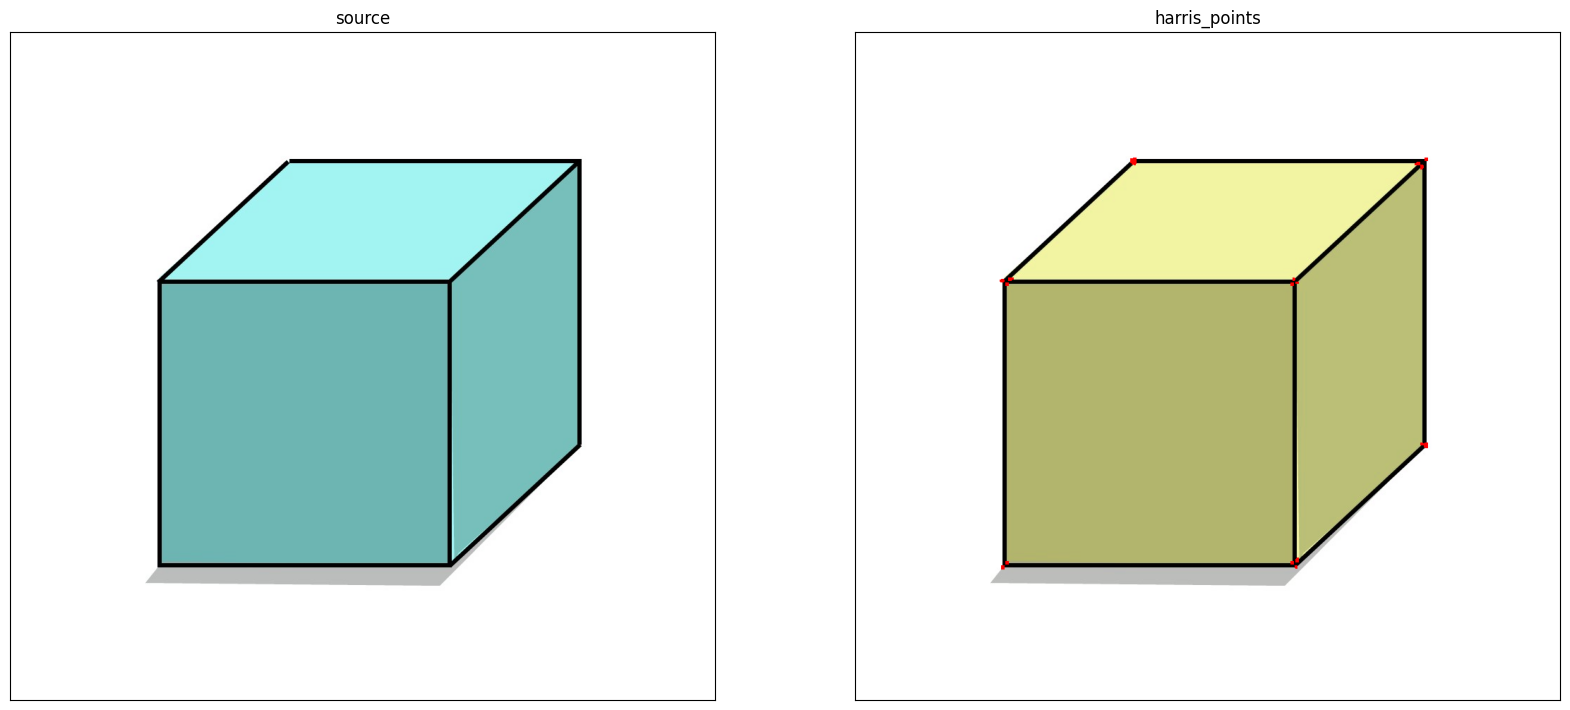

In [4]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points(image), 'harris_points', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [5]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    
    #############
    # Your code #
    #############

    # convert the input image into
    # grayscale color space
    result=image.copy()
    grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # modify the data type
    # setting to 32-bit floating point
    grayimg = np.float32(grayimg)

    # apply the cv2.cornerHarris method
    dest = cv2.cornerHarris(grayimg, 3, 3, 0.04)
    
    # Results are marked through the dilated corners
    dest = cv2.dilate(dest, None)

    result[dest > 0.005 * dest.max()]=[255, 0, 0]
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

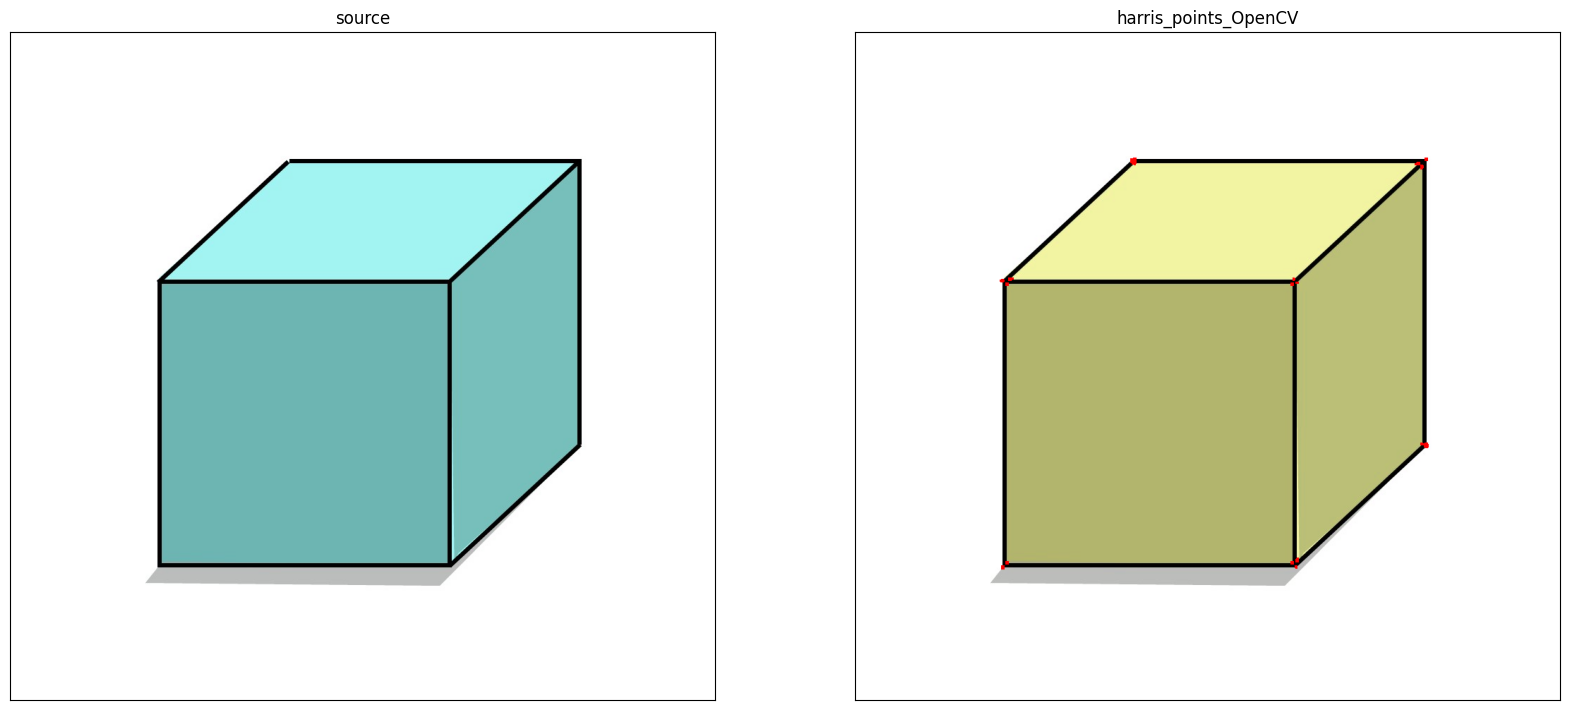

In [6]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')